In [2]:
using PyCall
using PyPlot
using LaTeXStrings
using LinearAlgebra

In [5]:
mp = pyimport("mpmath")

PyObject <module 'mpmath' from '/home/arurz/.local/lib/python3.6/site-packages/mpmath/__init__.py'>

In [6]:
rc("text",usetex=true)

In [7]:
N = 5;
k0 = 1;
kx = 1.2;
ky = 1.5;
g = 0.25;

theta = (1/2)*atan((2*g)/(kx-ky));

Kx = (kx+ky)/2 - (1/2)*sqrt((kx - ky)^2+4*g^2); 
Ky = (kx+ky)/2 + (1/2)*sqrt((kx - ky)^2+4*g^2); 

omegax = sqrt(Kx);
omegay = sqrt(Ky);

In [8]:
function kxt(kx,ky,g)
    return (1/2)*((kx+ky)-sqrt((kx-ky)^2+4*g^2))
end

function kta(kx,ky,g,a)
    return (1/2)*(kx+ky+(kx-ky)*cos(a)-2*g*sin(2*a))
end

kta (generic function with 1 method)

In [9]:
lx = range(0,stop=12,length=300)
ly = range(0,stop=6,length=300)
kx1 = zeros(Float64,(length(lx),length(ly)))
kx2 = zeros(Float64,(length(lx),length(ly)))
kx3 = zeros(Float64,(length(lx),length(ly)))
kx4 = zeros(Float64,(length(lx),length(ly)))

for i = 1:length(lx)
    for j = 1:length(ly)
        kx1[i,j] = kxt(lx[i],2,ly[j])
    end
end
for i = 1:length(lx)
    for j = 1:length(ly)
        kx2[i,j] = kxt(lx[i],4,ly[j])
    end
end
for i = 1:length(lx)
    for j = 1:length(ly)
        kx3[i,j] = kxt(lx[i],6,ly[j])
    end
end
for i = 1:length(lx)
    for j = 1:length(ly)
        kx4[i,j] = kxt(lx[i],8,ly[j])
    end
end

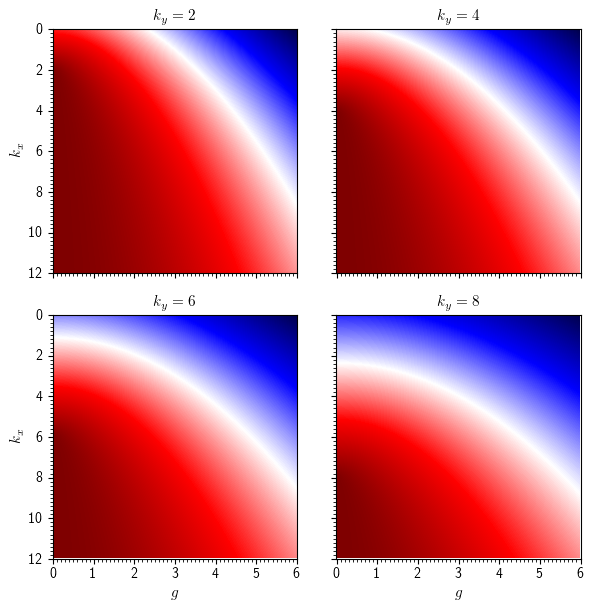

In [13]:
cm = "seismic"

ww = 6.20
hh = ww

fig,(ax1,ax2,ax3,ax4)=plt.subplots(2,2,figsize=(ww,hh),sharex=true,sharey=true)
subplots_adjust(hspace = 0.2)

ax1.imshow(kx1,cmap=cm)
ax2.imshow(kx3,cmap=cm)
ax3.imshow(kx2,cmap=cm)
ax4.imshow(kx4,cmap=cm)

ax1.set_xticks([0,50,100,150,200,250,300])
ax1.set_yticks([0,50,100,150,200,250,300])
ax2.set_xticks([0,50,100,150,200,250,300])
ax2.set_yticks([0,50,100,150,200,250,300])
ax3.set_xticks([0,50,100,150,200,250,300])
ax3.set_yticks([0,50,100,150,200,250,300])
ax4.set_xticks([0,50,100,150,200,250,300])
ax4.set_yticks([0,50,100,150,200,250,300])

ax1.set_xticklabels([0,1,2,3,4,5,6],fontsize=10)
ax1.set_yticklabels([0,2,4,6,8,10,12],fontsize=10)
ax2.set_xticklabels([0,1,2,3,4,5,6],fontsize=10)
ax2.set_yticklabels([0,2,4,6,8,10,12],fontsize=10)
ax3.set_xticklabels([0,1,2,3,4,5,6],fontsize=10)
ax3.set_yticklabels([0,2,4,6,8,10,12],fontsize=10)
ax4.set_xticklabels([0,1,2,3,4,5,6],fontsize=10)
ax4.set_yticklabels([0,2,4,6,8,10,12],fontsize=10)

ax1.set_yticks(0:5:300, minor = true)
ax1.set_xticks(0:5:300, minor = true)
ax2.set_yticks(0:5:300, minor = true)
ax2.set_xticks(0:5:300, minor = true)
ax3.set_yticks(0:5:300, minor = true)
ax3.set_xticks(0:5:300, minor = true)
ax4.set_yticks(0:5:300, minor = true)
ax4.set_xticks(0:5:300, minor = true)

ax1.set_ylabel(L"$k_{x}$",fontsize=11)
ax2.set_ylabel(L"$k_{x}$",fontsize=11)
ax2.set_xlabel(L"$g$",fontsize=11)
ax4.set_xlabel(L"$g$",fontsize=11)

ax1.set_title(L"k_{y}=2",fontsize=11)
ax2.set_title(L"k_{y}=6",fontsize=11)
ax3.set_title(L"k_{y}=4",fontsize=11)
ax4.set_title(L"k_{y}=8",fontsize=11)

#pcm1 = ax1.get_children()[10]
#cb1 = colorbar(pcm1,ax=ax1,extend="both",orientation="vertical",shrink=0.8,aspect=80,spacing="proportional",fraction=0.05)
#cb1.ax.tick_params(labelsize=12,length=5,width=1,direction="inout")
#pcm2 = ax2.get_children()[10]
#cb2 = colorbar(pcm2,ax=ax2,extend="both",orientation="vertical",shrink=0.8,aspect=80,spacing="proportional",fraction=0.05)
#cb2.ax.tick_params(labelsize=12,length=5,width=1,direction="inout")
#pcm3 = ax3.get_children()[10]
#cb3 = colorbar(pcm3,ax=ax3,extend="both",orientation="vertical",shrink=0.8,aspect=80,spacing="proportional",fraction=0.05)
#cb3.ax.tick_params(labelsize=12,length=5,width=1,direction="inout")
#pcm4 = ax4.get_children()[10]
#cb4 = colorbar(pcm4,ax=ax4,extend="both",orientation="vertical",shrink=0.8,aspect=80,spacing="proportional",fraction=0.05)
#cb4.ax.tick_params(labelsize=12,length=5,width=1,direction="inout")
#cb.ax.set_ylabel("Amplitud",fontsize=12,labelpad=0)

tight_layout(rect=(0, 0, 1, 1))
show()

savefig("prop_pht.pdf", transparent = "true", dpi=300, bbox_inches="tight", pad_inches=0)

In [15]:
function psi(n,q)
    return (1/sqrt((2^n)*(factorial(n))*sqrt(pi)))*exp(-q^2/2)*convert(Float64,mp.hermite(n,q))
end

psi (generic function with 1 method)

In [16]:
ll = range(-N,stop=N,length=300)
v1 = zeros(Float64,length(ll))
for i = 1:length(ll)
    v1[i] = psi(0,ll[i])
end

In [17]:
function E(nx,ny,x,y)
    return abs2.(psi(nx,x)*psi(ny,y))
end

function ER(nx,ny,x,y,theta)
    return E(nx,ny,x*cos(theta)-y*sin(theta),y*cos(theta)+x*sin(theta))
end

ER (generic function with 1 method)

In [18]:
dim = 100;
nx = 1;
ny = 1;

ex = range(-N,stop=N,length=dim)
ey = range(-N,stop=N,length=dim)

dxy = zeros(Float64,(length(ex),length(ey)))
dxyr = zeros(Float64,(length(ex),length(ey)))

for i = 1:length(ex)
    for j = 1:length(ey)
        dxy[i,j] = E(nx,ny,ex[i],ey[j])
    end
end

for i = 1:length(ex)
    for j = 1:length(ey)
        dxyr[i,j] = ER(nx,ny,ex[i],ey[j],theta)
    end
end

In [19]:
d1 = zeros(Float64,(length(ex),length(ey)))
d2 = zeros(Float64,(length(ex),length(ey)))
d3 = zeros(Float64,(length(ex),length(ey)))
d4 = zeros(Float64,(length(ex),length(ey)))

for i = 1:length(ex)
    for j = 1:length(ey)
        d1[i,j] = ER(1,1,ex[i],ey[j],theta)
    end
end
for i = 1:length(ex)
    for j = 1:length(ey)
        d2[i,j] = ER(2,2,ex[i],ey[j],theta)
    end
end
for i = 1:length(ex)
    for j = 1:length(ey)
        d3[i,j] = ER(3,3,ex[i],ey[j],theta)
    end
end
for i = 1:length(ex)
    for j = 1:length(ey)
        d4[i,j] = ER(4,4,ex[i],ey[j],theta)
    end
end

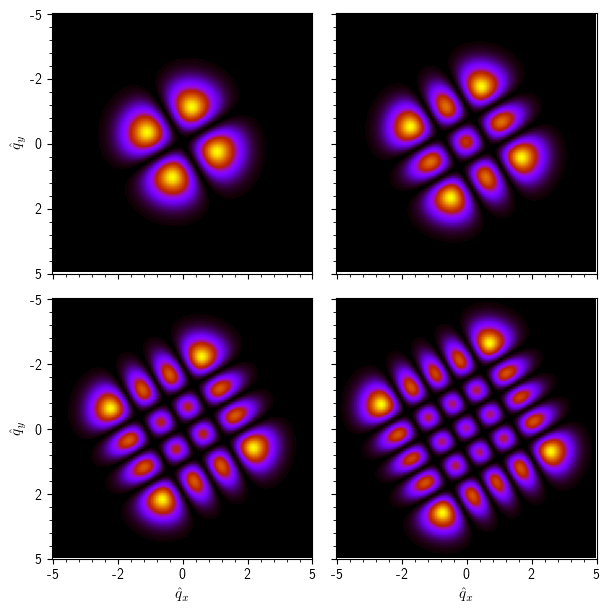

In [24]:
ww = 6.20
hh = ww

cm = "gnuplot"

fig,(ax1,ax2,ax3,ax4)=plt.subplots(2,2,figsize=(ww,hh),sharex=true,sharey=true)
subplots_adjust(hspace = 0.1)

ax1.imshow(d1,cmap=cm)
ax2.imshow(d3,cmap=cm)
ax3.imshow(d2,cmap=cm)
ax4.imshow(d4,cmap=cm)

ax1.set_yticks(0:25:100, minor=false)
ax1.set_yticklabels([-5,-2,0,2,5],fontsize=10)
ax2.set_yticks(0:25:100, minor=false)
ax2.set_yticklabels([-5,-2,0,2,5],fontsize=10)

ax2.set_xticks(0:25:100, minor=false)
ax2.set_xticklabels([-5,-2,0,2,5],fontsize=10)
ax4.set_xticks(0:25:100, minor=false)
ax4.set_xticklabels([-5,-2,0,2,5],fontsize=10)


ax1.set_yticks(0:5:100, minor = true)
ax1.set_xticks(0:5:100, minor = true)
ax2.set_yticks(0:5:100, minor = true)
ax2.set_xticks(0:5:100, minor = true)
ax3.set_yticks(0:5:100, minor = true)
ax3.set_xticks(0:5:100, minor = true)
ax4.set_yticks(0:5:100, minor = true)
ax4.set_xticks(0:5:100, minor = true)

ax1.set_ylabel(L"$\hat{q}_{y}$",fontsize=11)
ax2.set_ylabel(L"$\hat{q}_{y}$",fontsize=11)
ax2.set_xlabel(L"$\hat{q}_{x}$",fontsize=11)
ax4.set_xlabel(L"$\hat{q}_{x}$",fontsize=11)

#pcm = ax1.get_children()[10]
#cb = colorbar(pcm,ax=(ax1,ax2,ax3),extend="both",ticks=[0.0,0.2,0.4,0.6,0.8,1.0],orientation="vertical",shrink=0.8,aspect=80,spacing="proportional",fraction=0.05)
#cb.ax.tick_params(labelsize=14,length=5,width=1,direction="inout")
#cb.ax.set_ylabel("Amplitud",fontsize=12,labelpad=0)

tight_layout(rect=(0, 0, 1, 1))
show()

savefig("prop_inv.pdf", transparent = "true", dpi=300, bbox_inches="tight", pad_inches=0)

In [21]:
kappa = sqrt(Complex(k0^2-kx-ky));

function Omega(nx,ny)
    return kx+ky-omegax*(nx+1)-omegay*(ny+1)
end

Omega (generic function with 1 method)

In [27]:
function EHz(x,y,z,nx,ny)
    return exp(-1im*z*(kappa/sqrt(2*k0))*(1-(Omega(nx,ny)/(2*kappa^2))-(Omega(nx,ny)^2/(8*kappa^4))))*psi(nx,x*cos(theta)-y*sin(theta))*psi(ny,y*cos(theta)+x*sin(theta))
    end

EHz (generic function with 1 method)

In [106]:
qz = 0;
h1 = zeros(ComplexF64,(length(ex),length(ey)));

for i = 1:length(ex)
    for j = 1:length(ey)
        h1[i,j] = EHz(ex[i],ey[j],1,1,1)
    end
end

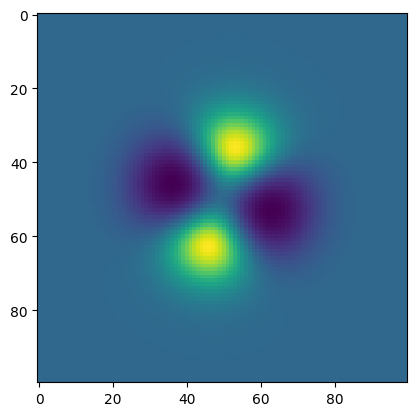

PyObject <matplotlib.image.AxesImage object at 0x7efc714ab978>

In [107]:
imshow(real(d1-h1))